# Classification Project: Handwritten Digits and Dog Breeds

## Mission Statement:
This project aims to classify handwritten digits and dog breeds using various machine learning models.

### Dataset Descriptions:
#### Handwritten Digits (MNIST dataset from Kaggle)
**Format:** 2D arrays representing images
**Size:** 60,000 training images and 10,000 testing images.
**Target:** 10 classes (digits from 0 - 9.)

#### Dog Breeds (dataset from Kaggle)
**Format:** RGB images of different sizes.
**Size:** 20,000+ images of about 120 dog breeds.
**Target:** Specific dog breeds.

## Classification Strategy:
- For Handwritten Digits, I would do the following:
  - Normalize pixel values
  - One-hot encode labels
  - Flatten the images
  - Use a neural network with dense layers

- For Dog Breeds:
  - Use VGG16 as the base model
  - Data augmentation with ImageDataGenerator
  - Flatten the output of VGG16
  - Add dense layers for classification



### Importing Libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import seaborn as sns

### Loading & exploring the training and testing datasets

In [17]:
np.random.seed(0)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
# Exploring the data
print("Handwritten Digits Dataset:")
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)
num_classes = 10

Handwritten Digits Dataset:
Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


### Visualizing the samples

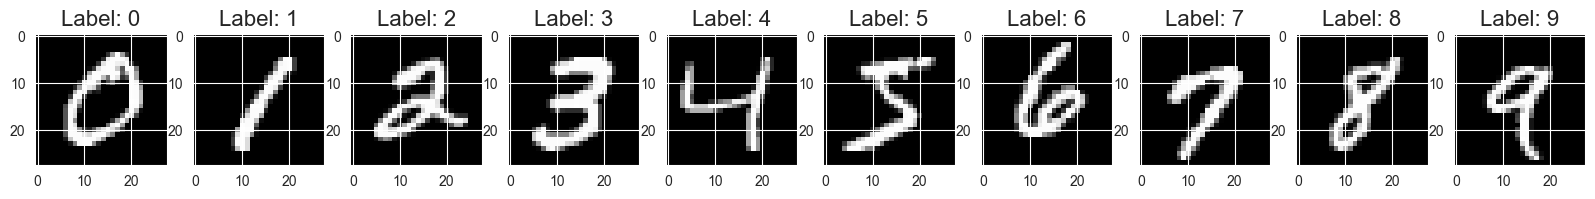

In [19]:
f, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [20]:
#To see our labels
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [79]:
# One-hot encode labels
num_classes = 10
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

In [80]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [86]:
from keras.utils import to_categorical

# One-hot encode labels
num_classes = 10
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

print("Shape of y_train_encoded:", y_train_encoded.shape)  # It should be (60000, 10)
print("Shape of y_test_encoded:", y_test_encoded.shape)    # It should be (10000, 10)


Shape of y_train_encoded: (60000, 10, 10, 10, 10)
Shape of y_test_encoded: (10000, 10, 10, 10, 10)


# Model for Handwritten Digits

## Defining Baseline Model (Feed-forward Neural Network)

In [82]:
# Define the model
model = Sequential()

# Add the input layer
model.add(Dense(64, input_shape=(784,), activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                50240     
                                                                 
 dense_35 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the baseline model

In [83]:
# Train the model
history = model.fit(x_train_reshaped, y_train_encoded,
                    validation_data=(x_test_reshaped, y_test_encoded),
                    batch_size=batch_size, epochs=epochs, verbose=2)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10, 10, 10) and (None, 10) are incompatible


In [52]:
# Define the baseline model
baseline_model_digits = Sequential()
baseline_model_digits.add(Dense(64, input_shape=(784,), activation='relu'))
baseline_model_digits.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes
baseline_model_digits.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
baseline_model_digits.summary()

# Train the baseline model
history_baseline = baseline_model_digits.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=2)

# Evaluate the baseline model
test_loss_baseline, test_acc_baseline = baseline_model_digits.evaluate(x_test, y_test, verbose=2)
print("Baseline Model - Test Loss: {}, Test Accuracy: {}".format(test_loss_baseline, test_acc_baseline))


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                50240     
                                                                 
 dense_25 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


ValueError: in user code:

    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\johno\miniconda3\lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10, 10) and (None, 10) are incompatible


### Training

In [26]:
batch_size = 512
epochs = 5
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 2s 11ms/step - loss: 0.5776 - accuracy: 0.8311
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.2266 - accuracy: 0.9345
Epoch 3/10
118/118 [==============================] - 1s 11ms/step - loss: 0.1646 - accuracy: 0.9521
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1314 - accuracy: 0.9615
Epoch 5/10
118/118 [==============================] - 2s 16ms/step - loss: 0.1107 - accuracy: 0.9672
Epoch 6/10
118/118 [==============================] - 2s 15ms/step - loss: 0.0950 - accuracy: 0.9714
Epoch 7/10
118/118 [==============================] - 2s 16ms/step - loss: 0.0813 - accuracy: 0.9757
Epoch 8/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0712 - accuracy: 0.9782
Epoch 9/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0629 - accuracy: 0.9811
Epoch 10/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0565 - accura

### Evaluation of model using test dataset

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

NameError: name 'model' is not defined

### Prediction

In [28]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[2.0499747e-06 2.8996390e-06 5.8263748e-05 ... 9.9986243e-01
  2.5918209e-06 1.3291698e-05]
 [3.6880056e-08 9.7780976e-05 9.9987978e-01 ... 4.8260538e-09
  5.2258160e-06 1.9675533e-10]
 [8.8596025e-06 9.9769068e-01 3.5060648e-04 ... 1.2004459e-03
  4.3092898e-04 1.8068607e-05]
 ...
 [1.2367900e-11 1.5667911e-09 6.1690747e-10 ... 8.4811927e-06
  2.5452847e-08 2.3775060e-06]
 [6.6887260e-08 1.1340412e-09 7.0864903e-10 ... 1.3458650e-09
  2.6995751e-05 4.1778709e-09]
 [1.7138755e-07 7.3360951e-10 2.5924185e-08 ... 3.7814713e-11
  5.6988405e-09 9.8820618e-10]]
[7 2 1 ... 4 5 6]


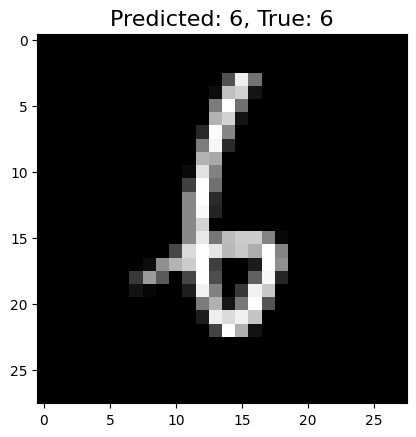

In [29]:
# Random prediction
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

### Confusion Matrix

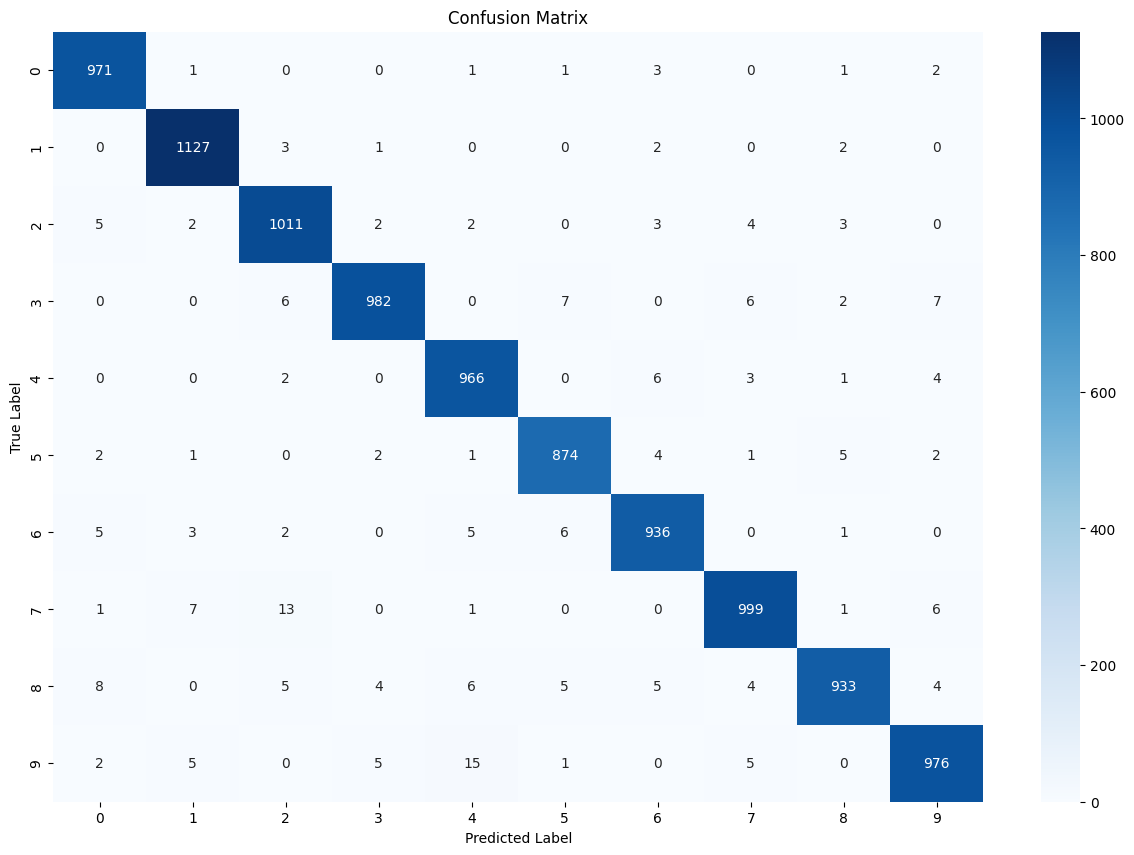

In [30]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

#plot
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

***We can see that using the confusion matrix helps us see the accuracy of the model. Every column in every row is a class for a digit with our "True label" on the Y axis and the "Predicted Label" on the X-axis***

***From the first row, for every 0 that had a true label of zero, the model predicted 971 zeros. This can be seen for all the other other numbers till 9 which means our model is quite accurate***

## Dog Breeds Classification

In [9]:
# Importing necessary libraries
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers

### Loading and Pre-processing the data

In [11]:
path = r'C:\Users\johno\Desktop\EPITA\Fall 2023\Computer Vision - Prof Aurelien Quillet\Projects - Computer Vision\dog-breed-identification'
labels_path = "./dog-breed-identification/labels.csv"
labels_df = pd.read_csv(labels_path)
breed = labels_df["breed"].unique()
train_path = os.path.join(path, "train/*")

In [12]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Creating Data generators
train_generator = train_datagen.flow_from_dataframe(
    labels_df,
    directory=train_path,
    x_col="id",
    y_col="breed",
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32,
    subset="training"
)

validation_generator = train_datagen.flow_from_dataframe(
    labels_df,
    directory=train_path,
    x_col="id",
    y_col="breed",
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=32,
    subset="validation"
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


C:\Users\johno\miniconda3\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 10222 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(
C:\Users\johno\miniconda3\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 10222 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [13]:
# Building the model with VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model_vgg16 = models.Sequential()
model_vgg16.add(base_model)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(256, activation='relu'))
model_vgg16.add(layers.Dropout(0.5))
model_vgg16.add(layers.Dense(len(labels_df["breed"].unique()), activation='softmax'))

model_vgg16.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])




58889256/58889256 [==============================] - 4s 0us/step
